In [2]:
import exifread
# Open image file for reading (binary mode)
f = open("../data/raw/IMAG0001.JPG", 'rb')

# Return Exif tags
tags = exifread.process_file(f)

## First Explore

In [48]:
# investigate time distribution of images

import pandas as pd
import numpy as np
import datetime
import os 


time = tags['EXIF DateTimeOriginal'].values
time = datetime.datetime.strptime(time, '%Y:%m:%d %H:%M:%S')
print('Time of image:', time)


def get_image_times(path):
    """
    Get time of image from EXIF data
    :param path: path to image
    :return: dataframe with time and path of image
    """
    times = pd.DataFrame(columns=['time', 'path'])
    for filename in os.listdir(path):
        f = open(os.path.join(path, filename), 'rb')
        tags = exifread.process_file(f)
        time = tags['EXIF DateTimeOriginal'].values
        time = datetime.datetime.strptime(time, '%Y:%m:%d %H:%M:%S')
        times = pd.concat([times, pd.DataFrame({'time': time, 'path': os.path.join(path, filename)}, index=[0])])
    return times

Time of image: 2020-12-04 17:31:53


In [50]:
image_times = get_image_times('../data/raw')

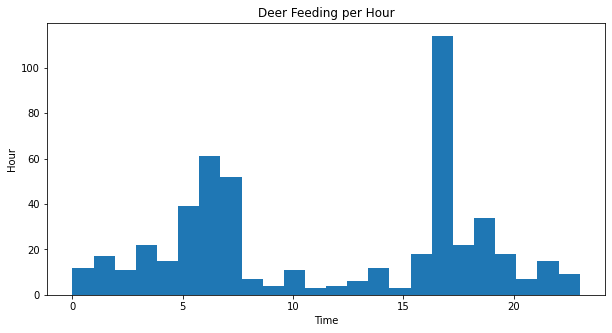

In [52]:
# plot image times daily

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

image_times['timestamp'] = pd.to_datetime(image_times['time'])
image_times['day'] = image_times['timestamp'].dt.dayofyear
image_times['hour'] = image_times['timestamp'].dt.hour
image_times['minute'] = image_times['timestamp'].dt.minute

# plot histogram hour
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(image_times['hour'], bins=24)
ax.set_xlabel('Time')
ax.set_ylabel('Hour')
ax.set_title('Deer Feeding per Hour')
plt.show()